# csv 파일 불러오기, DataFrame 생성

파일명: 제품명_modeling.csv 데이터 불러오기
* csv 파일은 작업 상태인 리뷰 중 카테고리가 빈 것은 제거 후 가져온다.

In [39]:
#구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd
import re
import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_rows', 30) # row 생략 없이 출력
pd.set_option('display.max_columns', 30) # col 생략 없이 출력

In [41]:
#청소기
#path = "/content/drive/MyDrive/lg_modeling/cleaner_modeling.csv"
#냉장고
path = "/content/drive/MyDrive/lg_modeling/refrigerator_modeling.csv"
#식세기
#path = "/content/drive/MyDrive/lg_modeling/dishwasher_modeling.csv"

data = pd.read_csv(path, sep=',', encoding = 'utf-8')
data.rename(columns={'리뷰 번호' : 'Review_Num', 
                    '리뷰 원문' : 'Original_Comment',
                    '카테고리' : 'Category'}, inplace=True)
data['Category'] = data['Category'].str.split('and')
print(data.shape)
data.tail(20)

(9865, 3)


,Review_Num,Original_Comment,Category
9845,117548,디자인도이쁘고 배송 친절함 모두 만족합니다,[디자인]
9846,117549,디자인도 깔끔하고 맘에 들어요,"[디자인, 디자인]"
9847,117553,넓어서좋고디자인도넘예쁘네요,[디자인]
9848,117560,깔끔한 디자인에 아주 맘에 듭니다,"[디자인, 디자인]"
9849,117561,깔끔한 디자인에 다른 김치냉장고보다 너비는 슬림하고 높이가 약간 높아서 작은 공간에...,"[디자인, 공간효율성, 디자인, 디자인]"
9850,117562,깔끔하고 예쁩니다 가성비 너무 좋아요,[디자인]
9851,117567,급히 필요해서 배송시기를 당겨 부탁드렸는데 빠른배송설치 감사합니다 가격에서 만족하고...,"[디자인, 디자인]"
9852,117571,가격도 저렴하고 김치냉장고 디자인도 마음에들고 성능도 좋습니다,[디자인]
9853,117577,화이트 깔끔하니 야무집니다 배송기사님 야무지게 포장 쓰레기까지 완벽하게 해 주시네...,[디자인]
9854,117580,한번씩 소리가 크게 들릴때도 있긴한데 그래도 대체적으로 만족합니다 안이 넓어 좋아여,"[공간효율성, 소음]"


In [42]:
#####---- NaN값 제거 ----#####
data = data.dropna(axis=0, how='any')
data = data.reset_index(drop=True)
data.isna().sum()

Review_Num          0
Original_Comment    0
Category            0
dtype: int64

In [43]:
#####---- 중복 제거 ----#####
all_categorys = []
for i in range(len(data)):
  data['Category'][i] = list(set(data['Category'][i]))
  all_categorys += data['Category'][i]
print(data.shape)
data.tail(20)

(9865, 3)


,Review_Num,Original_Comment,Category
9845,117548,디자인도이쁘고 배송 친절함 모두 만족합니다,[디자인]
9846,117549,디자인도 깔끔하고 맘에 들어요,[디자인]
9847,117553,넓어서좋고디자인도넘예쁘네요,[디자인]
9848,117560,깔끔한 디자인에 아주 맘에 듭니다,[디자인]
9849,117561,깔끔한 디자인에 다른 김치냉장고보다 너비는 슬림하고 높이가 약간 높아서 작은 공간에...,"[디자인, 공간효율성]"
9850,117562,깔끔하고 예쁩니다 가성비 너무 좋아요,[디자인]
9851,117567,급히 필요해서 배송시기를 당겨 부탁드렸는데 빠른배송설치 감사합니다 가격에서 만족하고...,[디자인]
9852,117571,가격도 저렴하고 김치냉장고 디자인도 마음에들고 성능도 좋습니다,[디자인]
9853,117577,화이트 깔끔하니 야무집니다 배송기사님 야무지게 포장 쓰레기까지 완벽하게 해 주시네...,[디자인]
9854,117580,한번씩 소리가 크게 들릴때도 있긴한데 그래도 대체적으로 만족합니다 안이 넓어 좋아여,"[소음, 공간효율성]"


# 리뷰 전처리

### 불필요한 문자열 제거 (리뷰 원문 전처리)

In [44]:
# html태그 제거
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'<[^>]*>', repl=r'', regex=True)

# email 주소 제거
data['Original_Comment']=data['Original_Comment'].str.replace(pat=r'(\[a-zA-Z0-9\_.+-\]+@\[a-zA-Z0-9-\]+.\[a-zA-Z0-9-.\]+)', 
                                             repl=r'', regex=True)

# _제거
data['Original_Comment']=data['Original_Comment'].str.replace('_', '')

# \r, \n 제거
data['Original_Comment']=data['Original_Comment'].str.replace(pat=r'[\r|\n]', repl=r'', regex=True)

# url 제거
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*',repl=r'', regex=True)

# 자음, 모음 제거
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'([ㄱ-ㅎㅏ-ㅣ]+)', repl=r'', regex=True)

# 특수 기호 제거
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'[^\w\s]', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace('1n', '')
data['Original_Comment'] = data['Original_Comment'].str.replace('_', '')

# 모두 영어인 행 공백으로 대체
data['Original_Comment'] =data['Original_Comment'].str.replace(pat=r'^[a-zA-Z\s]+$', repl=r'', regex=True)

# 모두 숫자인 행 공백으로 대체
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'^[0-9\s]+$', repl=r'', regex=True)

# 좌우 공백 제거
data['Original_Comment']= data['Original_Comment'].str.strip()

# 아이디 관련 단어 제거
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'ID\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'아이디\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'id\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'ID[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'아이디[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'id[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'ID\s', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'아이디\s', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'id\s', repl=r'', regex=True)

# 주문번호 관련 단어 제거
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'주문번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'결제번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'구매번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'주문\s번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'결제\s번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'구매\s번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'주문번호\s', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'결제번호\s', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'구매번호\s', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'주문\s번호\s', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'결제\s번호\s', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'구매\s번호\s', repl=r'', regex=True)

In [45]:
data.head(10)

,Review_Num,Original_Comment,Category
0,72312,흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다,[디자인]
1,72317,가격만 빼면 모든게 괜찮네요 한가지 아쉬운건 아이스메이커의 얼음이 너무 적고 반자동...,[동작편리성]
2,72319,편하고 크고 깨끗하고 좋아요,[공간효율성]
3,72322,크기가 맘에들어요 완전 화이트 색상을 찾았는데 아쉬웠지만 살짝 어두운곳에두니 화이...,"[디자인, 공간효율성]"
4,72323,칸칸이 용도구분할 수 있어서아주좋아요,[공간효율성]
5,72324,칸칸이 서랍식이라 재료를 잘 분리해서 냉동할수있고 확인 하기가 좋습니다자리도 많이 ...,"[디자인, 공간효율성]"
6,72333,배달예상 시간이 많이 갈릴줄 알았는데 정확히 7일 걸렸네요 출근중이라 아들만 있었는...,"[디자인, 조작편리성, 시인성가독성, 소음]"
7,72348,좋습니다4도어최고,[공간효율성]
8,72349,동생네 집에도 쓰고 있어서 보고 구입했습니다 좋습니다 많이 들어가고,[공간효율성]
9,72353,좋네요 가격도 좋고용량도 넓직하니 사무실이나 원룸용으로 딱,[공간효율성]


# 데이터 증강하기
1. konlpy의 조사 제거 모듈 사용하여 조사 없는 데이터 생성(참고 자료 : https://cd-programming.tistory.com/215)
2. textaugment 라이브러리 사용하여 20% 삭제하거나 일부분 shuffle하게 만들었음(참고 자료 : https://github.com/dsfsi/textaugment.git)


In [46]:
##### ---- 300개 이하인 데이터만 추출(기준은 언제든지 바꿔도 됨!) ---- #####
import collections
category_counts = dict(collections.Counter(all_categorys))
category_plus = []
for i in category_counts:
  if category_counts[i] <= 300:
    category_plus.append(i)
print(category_counts)
print(category_plus)

review_number, review_original, review_category = [], [], []
for i in range(len(data['Category'])):
  for k in data['Category'][i]:
    if k in category_plus:
      review_number.append(data['Review_Num'][i])
      review_original.append(data['Original_Comment'][i])
      review_category.append(data['Category'][i])
      break
under_300 = pd.DataFrame({'Review_Num':review_number, 'Original_Comment':review_original, 'Category':review_category})
under_300.shape

{'디자인': 6392, '동작편리성': 791, '공간효율성': 2114, '조작편리성': 85, '시인성가독성': 90, '소음': 1887, '기타': 271, '위생': 99, '촉감': 8, '사운드': 21, '견고성': 323, '조명': 91, '안전성': 34, '유지관리': 171, '정보성': 16, '조립성': 36}
['조작편리성', '시인성가독성', '기타', '위생', '촉감', '사운드', '조명', '안전성', '유지관리', '정보성', '조립성']


(864, 3)

In [47]:
!pip install numpy nltk gensim textblob googletrans
!pip install textaugment
!pip install tqdm
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
from konlpy.tag import Okt  

def josa_deletion(sentence):
	tagged_sentences =[]
	sentences = []
	pos_tags = []
	tokenizer = Okt()
	temp_X = tokenizer.pos(sentence)
	tagged_sentences.append(temp_X)

	for tagged_sentence in tagged_sentences:
		sentence, tag_info = zip(*tagged_sentence)
		sentences.append(list(sentence))
		pos_tags.append(list(tag_info))
	sentences = sentences[0]
	pos_tags = pos_tags[0]

	idx = [ i for i, value in enumerate(pos_tags) if "Josa" in value]

	if len(idx) != 0:
		for n in idx:
			sentences[n]= None

		new_sentence= list(filter(None, sentences))

		new_sen = ""
		for i in new_sentence:
			new_sen = new_sen + " " + i
	else:
		new_sen = ""

	return new_sen

In [49]:
from tqdm import tqdm_notebook
from textaugment import EDA
import nltk
nltk.download('stopwords')
t = EDA()
review_number, review_original, review_category = [], [], []

for i in tqdm_notebook(range(len(under_300))):

  # 조사 제거하는 모듈
  review_number.append(under_300['Review_Num'][i])
  review_original.append(josa_deletion(under_300['Original_Comment'][i]))
  review_category.append(under_300['Category'][i])

  # 문장에서 20%만 삭제하는 모듈
  temp = t.random_deletion(under_300['Original_Comment'][i], p=0.2)
  review_number.append(under_300['Review_Num'][i])
  review_original.append(temp)
  review_category.append(under_300['Category'][i])

  # 문장에서 1번, 2번, 3번, 4번 셔플하는 모듈
  for k in range(4):
    temp = t.random_swap(under_300['Original_Comment'][i], n=k+1)
    review_number.append(under_300['Review_Num'][i])
    review_original.append(temp)
    review_category.append(under_300['Category'][i])
data_plus = pd.DataFrame({'Review_Num':review_number, 'Original_Comment':review_original, 'Category':review_category})
result_data = data.append(data_plus, ignore_index = True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  0%|          | 0/864 [00:00<?, ?it/s]

In [50]:
print('증강 대상 데이터 개수 : ', under_300.shape, "증강 후 데이터 개수 : ", data_plus.shape)
print('원래 데이터 개수: ', data.shape, '증강 후 데이터 개수: ', result_data.shape)
result_data.tail(20)

증강 대상 데이터 개수 :  (864, 3) 증강 후 데이터 개수 :  (5184, 3)
원래 데이터 개수:  (9865, 3) 증강 후 데이터 개수:  (15049, 3)


,Review_Num,Original_Comment,Category
15029,117409,13년 사용하던 냉장고가 고장나서 새로 구입하였습니다디자인도 예쁘고 너무 고급스럽고...,"[디자인, 기타, 소음]"
15030,117409,13년 사용하던 냉장고가 토요일 새로 구입하였습니다디자인도 예쁘고 너무 고급스럽고 ...,"[디자인, 기타, 소음]"
15031,117448,넓 찍 해서 안 청소 하기도 편하고 소음 없어요 디자인 깔끔하고 가격 대비 완전 ...,"[유지관리, 디자인, 소음]"
15032,117448,넓찍해서 안에 청소하기도 편하고 소음도 깔끔하고 가격대비 완전 만족스럽습니다안에 용...,"[유지관리, 디자인, 소음]"
15033,117448,넓찍해서 안에 청소하기도 편하고 만족스럽습니다안에 없어요디자인도 깔끔하고 가격대비 ...,"[유지관리, 디자인, 소음]"
15034,117448,소음도 가격대비 청소하기도 편하고 넓찍해서 없어요디자인도 깔끔하고 안에 완전 만족스...,"[유지관리, 디자인, 소음]"
15035,117448,넓찍해서 안에 청소하기도 편하고 소음도 완전 없어요디자인도 깔끔하고 가격대비 만족스...,"[유지관리, 디자인, 소음]"
15036,117448,청소하기도 안에 넓찍해서 깔끔하고 소음도 편하고 만족스럽습니다안에 가격대비 완전 없...,"[유지관리, 디자인, 소음]"
15037,117530,상품 품질 좋아요 추천 합니다 고민 만히 했는데 양 문 선택 잔잔하게 들어간 사 ...,"[유지관리, 디자인]"
15038,117530,상품 품질이 좋아요 추천합니다 고민 만히 했는데 양문으로 선택하고 잔잔하게 들어간 ...,"[유지관리, 디자인]"


# 새로운 DataFrame 생성 (해당하는 제품군에 맞게 선택)- 해당하는 제품군만 실행

In [51]:
new_df = pd.DataFrame({"original_comment": result_data['Original_Comment'], "category":result_data['Category']})

In [52]:
# #청소기에 해당하는 카테고리를 열에 추가
# new_df['소음']=0
# new_df['사운드']=0
# new_df['위생']=0
# new_df['디자인']=0
# new_df['그립감']=0
# new_df['청소가능영역']=0
# new_df['무게']=0
# new_df['촉감']=0
# new_df['핸들링']=0
# new_df['동작편리성']=0
# new_df['조작편리성']=0
# new_df['조립성']=0
# new_df['유지관리']=0
# new_df['정보성']=0
# new_df['흡입력']=0
# new_df['배터리']=0
# new_df['견고성']=0
# new_df['안전성']=0
# new_df['시인성가독성']=0
# new_df['기타']=0

In [53]:
#냉장고에 해당하는 카테고리를 열에 추가
new_df['소음']=0
new_df['사운드']=0
new_df['위생']=0
new_df['디자인']=0
new_df['조명']=0
new_df['촉감']=0
new_df['동작편리성']=0
new_df['조작편리성']=0
new_df['공간효율성']=0
new_df['조립성']=0
new_df['유지관리']=0
new_df['정보성']=0
new_df['견고성']=0
new_df['안전성']=0
new_df['시인성가독성']=0
new_df['기타']=0

In [54]:
# #식세기에 해당하는 카테고리를 열에 추가
# new_df['소음']=0
# new_df['사운드']=0
# new_df['위생']=0
# new_df['디자인']=0
# new_df['촉감']=0
# new_df['동작편리성']=0
# new_df['조작편리성']=0
# new_df['공간효율성']=0
# new_df['조립성']=0
# new_df['유지관리']=0
# new_df['정보성']=0
# new_df['견고성']=0
# new_df['안전성']=0
# new_df['시인성가독성']=0
# new_df['기타']=0

In [55]:
new_df

,original_comment,category,소음,사운드,위생,디자인,조명,촉감,동작편리성,조작편리성,공간효율성,조립성,유지관리,정보성,견고성,안전성,시인성가독성,기타
0,흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다,[디자인],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,가격만 빼면 모든게 괜찮네요 한가지 아쉬운건 아이스메이커의 얼음이 너무 적고 반자동...,[동작편리성],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,편하고 크고 깨끗하고 좋아요,[공간효율성],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,크기가 맘에들어요 완전 화이트 색상을 찾았는데 아쉬웠지만 살짝 어두운곳에두니 화이...,"[디자인, 공간효율성]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,칸칸이 용도구분할 수 있어서아주좋아요,[공간효율성],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15044,저렴하게 잘샀어요수납공간도 넓고 사용하기 편하게 되어 열고 닫을 때 좀 무겁고 메탈...,"[동작편리성, 유지관리, 공간효율성]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15045,저렴하게 잘샀어요수납공간도 넓고 사용하기 편하게 되어 있어요 열고 닫을 무겁고 문이...,"[동작편리성, 유지관리, 공간효율성]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15046,저렴하게 잘샀어요수납공간도 넓고 사용하기 편하게 되어 있어요 열고 닫을 때 메탈이라...,"[동작편리성, 유지관리, 공간효율성]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15047,저렴하게 잘샀어요수납공간도 넓고 사용하기 더 되어 있어요 열고 닫을 때 메탈이라 좀...,"[동작편리성, 유지관리, 공간효율성]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 각 리뷰에 해당하는 카테고리의 값을 1로 변경
### ex) [디자인, 동작편리성] -> 디자인 1, 동작편리성 1, 그 외 0

In [56]:
length=len(new_df)

for i in range(length):
    new_df.category[i]
    for l in new_df.category[i]:
        new_df[l][i] = 1

In [57]:
new_df

,original_comment,category,소음,사운드,위생,디자인,조명,촉감,동작편리성,조작편리성,공간효율성,조립성,유지관리,정보성,견고성,안전성,시인성가독성,기타
0,흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다,[디자인],0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,가격만 빼면 모든게 괜찮네요 한가지 아쉬운건 아이스메이커의 얼음이 너무 적고 반자동...,[동작편리성],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,편하고 크고 깨끗하고 좋아요,[공간효율성],0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,크기가 맘에들어요 완전 화이트 색상을 찾았는데 아쉬웠지만 살짝 어두운곳에두니 화이...,"[디자인, 공간효율성]",0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,칸칸이 용도구분할 수 있어서아주좋아요,[공간효율성],0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15044,저렴하게 잘샀어요수납공간도 넓고 사용하기 편하게 되어 열고 닫을 때 좀 무겁고 메탈...,"[동작편리성, 유지관리, 공간효율성]",0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
15045,저렴하게 잘샀어요수납공간도 넓고 사용하기 편하게 되어 있어요 열고 닫을 무겁고 문이...,"[동작편리성, 유지관리, 공간효율성]",0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
15046,저렴하게 잘샀어요수납공간도 넓고 사용하기 편하게 되어 있어요 열고 닫을 때 메탈이라...,"[동작편리성, 유지관리, 공간효율성]",0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
15047,저렴하게 잘샀어요수납공간도 넓고 사용하기 더 되어 있어요 열고 닫을 때 메탈이라 좀...,"[동작편리성, 유지관리, 공간효율성]",0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0


In [58]:
new_df = new_df.drop(columns=['category'])
new_df

,original_comment,소음,사운드,위생,디자인,조명,촉감,동작편리성,조작편리성,공간효율성,조립성,유지관리,정보성,견고성,안전성,시인성가독성,기타
0,흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,가격만 빼면 모든게 괜찮네요 한가지 아쉬운건 아이스메이커의 얼음이 너무 적고 반자동...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,편하고 크고 깨끗하고 좋아요,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,크기가 맘에들어요 완전 화이트 색상을 찾았는데 아쉬웠지만 살짝 어두운곳에두니 화이...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,칸칸이 용도구분할 수 있어서아주좋아요,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15044,저렴하게 잘샀어요수납공간도 넓고 사용하기 편하게 되어 열고 닫을 때 좀 무겁고 메탈...,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
15045,저렴하게 잘샀어요수납공간도 넓고 사용하기 편하게 되어 있어요 열고 닫을 무겁고 문이...,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
15046,저렴하게 잘샀어요수납공간도 넓고 사용하기 편하게 되어 있어요 열고 닫을 때 메탈이라...,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
15047,저렴하게 잘샀어요수납공간도 넓고 사용하기 더 되어 있어요 열고 닫을 때 메탈이라 좀...,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0


### 효율적인 코드 실행을 위해 한글로 되있는 열 이름을 영어로 변경

In [59]:
#청소기
# new_df.rename(columns={'소음':'noise'}, inplace=True)
# new_df.rename(columns={'사운드':'sound'}, inplace=True)
# new_df.rename(columns={'위생':'hygienic'}, inplace=True)
# new_df.rename(columns={'디자인':'design'}, inplace=True)
# new_df.rename(columns={'그립감':'grip'}, inplace=True)
# new_df.rename(columns={'청소가능영역':'cleanablearea'}, inplace=True)
# new_df.rename(columns={'무게':'weight'}, inplace=True)
# new_df.rename(columns={'촉감':'touch'}, inplace=True)
# new_df.rename(columns={'핸들링':'handling'}, inplace=True)
# new_df.rename(columns={'동작편리성':'movement'}, inplace=True)
# new_df.rename(columns={'조작편리성':'operation'}, inplace=True)
# new_df.rename(columns={'조립성':'ssembly'}, inplace=True)
# new_df.rename(columns={'유지관리':'maintenance'}, inplace=True)
# new_df.rename(columns={'정보성':'information'}, inplace=True)
# new_df.rename(columns={'흡입력':'power'}, inplace=True)
# new_df.rename(columns={'배터리':'battery'}, inplace=True)
# new_df.rename(columns={'견고성':'solidity'}, inplace=True)
# new_df.rename(columns={'안전성':'safety'}, inplace=True)
# new_df.rename(columns={'시인성가독성':'visibility'}, inplace=True)
# new_df.rename(columns={'기타':'etc'}, inplace=True)

# new_df

In [60]:
#냉장고
new_df.rename(columns={'소음':'noise'}, inplace=True)
new_df.rename(columns={'사운드':'sound'}, inplace=True)
new_df.rename(columns={'위생':'hygienic'}, inplace=True)
new_df.rename(columns={'디자인':'design'}, inplace=True)
new_df.rename(columns={'조명':'light'}, inplace=True)
new_df.rename(columns={'촉감':'touch'}, inplace=True)
new_df.rename(columns={'동작편리성':'movement'}, inplace=True)
new_df.rename(columns={'조작편리성':'operation'}, inplace=True)
new_df.rename(columns={'공간효율성':'space'}, inplace=True)
new_df.rename(columns={'조립성':'ssembly'}, inplace=True)
new_df.rename(columns={'유지관리':'maintenance'}, inplace=True)
new_df.rename(columns={'정보성':'information'}, inplace=True)
new_df.rename(columns={'견고성':'solidity'}, inplace=True)
new_df.rename(columns={'안전성':'safety'}, inplace=True)
new_df.rename(columns={'시인성가독성':'visibility'}, inplace=True)
new_df.rename(columns={'기타':'etc'}, inplace=True)

new_df

,original_comment,noise,sound,hygienic,design,light,touch,movement,operation,space,ssembly,maintenance,information,solidity,safety,visibility,etc
0,흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,가격만 빼면 모든게 괜찮네요 한가지 아쉬운건 아이스메이커의 얼음이 너무 적고 반자동...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,편하고 크고 깨끗하고 좋아요,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,크기가 맘에들어요 완전 화이트 색상을 찾았는데 아쉬웠지만 살짝 어두운곳에두니 화이...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,칸칸이 용도구분할 수 있어서아주좋아요,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15044,저렴하게 잘샀어요수납공간도 넓고 사용하기 편하게 되어 열고 닫을 때 좀 무겁고 메탈...,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
15045,저렴하게 잘샀어요수납공간도 넓고 사용하기 편하게 되어 있어요 열고 닫을 무겁고 문이...,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
15046,저렴하게 잘샀어요수납공간도 넓고 사용하기 편하게 되어 있어요 열고 닫을 때 메탈이라...,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
15047,저렴하게 잘샀어요수납공간도 넓고 사용하기 더 되어 있어요 열고 닫을 때 메탈이라 좀...,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0


In [61]:
# 식세기

# new_df.rename(columns={'소음':'noise'}, inplace=True)
# new_df.rename(columns={'사운드':'sound'}, inplace=True)
# new_df.rename(columns={'위생':'hygienic'}, inplace=True)
# new_df.rename(columns={'디자인':'design'}, inplace=True)
# new_df.rename(columns={'촉감':'touch'}, inplace=True)
# new_df.rename(columns={'동작편리성':'movement'}, inplace=True)
# new_df.rename(columns={'조작편리성':'operation'}, inplace=True)
# new_df.rename(columns={'공간효율성':'spaceefficiency'}, inplace=True)
# new_df.rename(columns={'조립성':'ssembly'}, inplace=True)
# new_df.rename(columns={'유지관리':'maintenance'}, inplace=True)
# new_df.rename(columns={'정보성':'information'}, inplace=True)
# new_df.rename(columns={'견고성':'solidity'}, inplace=True)
# new_df.rename(columns={'안전성':'safety'}, inplace=True)
# new_df.rename(columns={'시인성가독성':'visibility'}, inplace=True)
# new_df.rename(columns={'기타':'etc'}, inplace=True)

# new_df

# [NLP] 코랩에 konlpy 설치 후 okt 사용해보기 (이 코드에서는 사용 x -> 혹시 나중에 사용할 수도 있기 때문에 설치방법만 보기)

In [62]:
# # bash 셸로 명령어 입력하여 라이브러리 설치하기

# %%bash
# apt-get update
# apt-get install g++ openjdk-8-jdk python-dev python3-dev
# pip3 install JPype1
# pip3 install konlpy

In [63]:
# # JAVA_HOME 환경변수 설정하기

# %env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

In [64]:
# # 형태소
# print("okt.morphs : ", okt.morphs('흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다'))

# # 명사
# print("okt.nouns : ", okt.nouns('흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다'))

# # 형태소 + 품사
# print("okt.pos : ", okt.pos('흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다'))

# 토큰화 패키지 customized KoNLPy 사용
# 설명 https://wikidocs.net/44249 참고

In [65]:
!pip install customized_konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 잘못 토큰화될 가능성이 높은 일부 단어들을, customized KoNLPy를 통해 토큰으로 직접 지정

In [66]:
from ckonlpy.tag import Twitter

twi = Twitter()

words = [('디자인','Noun')]

for word in words:
    name, poomsa = word
    twi.add_dictionary(name, poomsa)

### 형태소 분석기를 사용하여 토큰화를 하면서 불용어를 제거하여 text_token에 저장

In [67]:
stopwords = ['의', '가', '이', '은', '들', '는', '과', '도', '를', '으로', '에',
             '하다', '을', '이다', '것', '로', '에서', '그', '인', '서', '네요',
             '임', '랑', '게', '요', '에게', '엔']

text_token = []
for sentence in new_df['original_comment']:
    tmp = []
    tmp = twi.morphs(str(sentence), stem=True, norm=True)  #토큰화
    tmp = [word for word in tmp if not word in stopwords]  #불용어 제거
    text_token.append(tmp)

In [68]:
print(text_token[:3])

[['흰색', '이라', '깨끗', '하고', '예쁘다', '요기', '다린', '보람', '있다', '자다', '쓰다'], ['가격', '만', '빼다', '모든', '괜찮다', '한가지', '아쉽다', '아이스', '메이커', '얼음', '너무', '적다', '반', '자동', '아니', '라는', '0'], ['편', '하고', '크다', '깨끗', '하고', '좋다']]


### 정수 인코딩 - 기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터에 정수 인코딩을 수행. 우선, 훈련 데이터에 대해서 단어 집합(vocaburary)을 만들기

In [69]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_token)

### 아래 결과를 보면단어가 9900개가 넘게 존재. 각 정수는 전체 훈련 데이터에서 등장 빈도수가 높은 순서대로 부여되었기 때문에, 높은 정수가 부여된 단어들은 등장 빈도수가 매우 낮다는 것을 의미.

In [70]:
print(tokenizer.word_index)

{'좋다': 1, '냉장고': 2, '어요': 3, '배송': 4, '있다': 5, '하고': 6, '고': 7, '보다': 8, '자다': 9, '설치': 10, '너무': 11, '같다': 12, '들다': 13, '기사': 14, '다': 15, '사용': 16, '없다': 17, '되다': 18, '한': 19, '디자인': 20, '어서': 21, '만족': 22, '해': 23, '문': 24, '친절': 25, '제품': 26, '해서': 27, '님': 28, '크다': 29, '받다': 30, '않다': 31, '냉동': 32, '해주': 33, '실': 34, '가격': 35, '주문': 36, '지만': 37, '구매': 38, '오다': 39, '안': 40, '쓰다': 41, '많이': 42, '생각': 43, '더': 44, '끄다': 45, '이라': 46, '맘': 47, '나': 48, '공간': 49, '냉장': 50, '좀': 51, '니': 52, '이쁘다': 53, '소음': 54, '넓다': 55, '만': 56, '감사': 57, '넘다': 58, '얼음': 59, '라': 60, 'lg': 61, '깔다': 62, '빠르다': 63, '기능': 64, '예쁘다': 65, '되어다': 66, '아주': 67, '때': 68, '전': 69, '형': 70, '사다': 71, '하': 72, '엘지': 73, '색상': 74, '네': 75, '칸': 76, '분': 77, '수납': 78, '용량': 79, '도어': 80, '넣다': 81, '작다': 82, '히': 83, '고장': 84, '마음': 85, '스럽다': 86, '거': 87, '정말': 88, '까지': 89, '화이트': 90, '저렴': 91, '다가': 92, '2': 93, '잘': 94, '가다': 95, '해주시': 96, '저': 97, '집': 98, '바꾸다': 99, '절하': 100, '메탈': 101, '친': 102, '매직'

### 빈도수가 낮은 단어들은 자연어 처리에서 배제. 등장 빈도수가 2회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인

### 아래 코드 결과: 등장 빈도가 threshold 값인 2회 미만. 즉, 1회 이하인 단어들은 단어 집합에서 무려 절반 이상을 차지. 하지만, 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 매우 적은 수치인 1.30%밖에 되지 않습니다. 아무래도 등장 빈도가 1회 이하인 단어들은 자연어 처리에서 별로 중요하지 않을 듯 함. 그래서 이 단어들은 정수 인코딩 과정에서 배제시킴

In [71]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 10008
등장 빈도가 1번 이하인 희귀 단어의 수: 3278
단어 집합에서 희귀 단어의 비율: 32.75379696243005
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.5635875666874702


### 등장 빈도수가 1이하인 단어들의 수를 제외한 단어의 개수를 단어 집합의 최대 크기로 제한

In [72]:
# 전체 단어 개수 중 빈도수 1이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 6731


### 케라스 토크나이저의 인자로 넘겨주고 텍스트 시퀀스를 정수 시퀀스로 변환

In [73]:
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(text_token)

X = tokenizer.texts_to_sequences(text_token)
print('리뷰의 최대 길이 :',max(len(l) for l in X))
print('리뷰의 평균 길이 :',sum(map(len, X))/len(X))

리뷰의 최대 길이 : 377
리뷰의 평균 길이 : 38.43132434048774


In [74]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

max_len = 120
below_threshold_len(max_len, X)
#문장 길이가 120로 할 경우, 약 97%의 대부분의 샘플을 커버 가능

전체 샘플 중 길이가 120 이하인 샘플의 비율: 95.24220878463684


### 각 리뷰 샘플들에 대해 패딩을 진행

In [75]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = pad_sequences(X, maxlen = max_len)
X

array([[   0,    0,    0, ...,    5,    9,   41],
       [   0,    0,    0, ...,  186,  633, 1497],
       [   0,    0,    0, ...,  655,    6,    1],
       ...,
       [   0,    0,    0, ...,  125,   94,  679],
       [   0,    0,    0, ...,  125,   94,  679],
       [   0,    0,    0, ...,  125,   94,  679]], dtype=int32)

### 16개 카테고리이기 때문에 y에는 16개의 label이 들어가도록 설정

In [76]:
import numpy as np
#청소기
# y = np.array(new_df.iloc[:, 1:21])
# y

#냉장고
y = np.array(new_df.iloc[:, 1:17])
y

#식세기
# y = np.array(new_df.iloc[:, 1:16])
# y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### 모델링을 위해 train, test set 분리

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = np.array(X_train)
X_test = np.array(X_test)

print(len(X_train))
print(len(X_test))

12039
3010


# 모델링 - GRU를 이용한 Multi-label 아키텍처를 이용하여 모델링을 진행

In [78]:
import tensorflow.keras.backend as K

def F1score(y_true, y_pred):
    eps = K.epsilon()
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    real_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    pred_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    recall = true_positives / (real_positives + eps)
    precision = true_positives / (pred_positives + eps)
    f1_score = 2 * (recall * precision) / (recall + precision + eps)
    return f1_score

In [79]:
#청소기
# label_names = new_df.columns[1:21] #label 종류
#냉장고
label_names = new_df.columns[1:17] #label 종류
#식세기
# label_names = new_df.columns[1:16] #label 종류
n_label = len(label_names)

y_train_list = {label_names[i]:y_train[:,i] for i in range(n_label)}
y_test_list = {label_names[i]:y_test[:,i] for i in range(n_label)}

y_train_list

{'noise': array([0, 1, 0, ..., 0, 0, 0]),
 'sound': array([0, 0, 0, ..., 0, 0, 0]),
 'hygienic': array([0, 0, 0, ..., 0, 0, 0]),
 'design': array([1, 0, 1, ..., 1, 1, 1]),
 'light': array([0, 0, 0, ..., 0, 0, 0]),
 'touch': array([0, 0, 0, ..., 0, 0, 0]),
 'movement': array([0, 0, 0, ..., 0, 0, 0]),
 'operation': array([0, 0, 0, ..., 0, 0, 0]),
 'space': array([0, 1, 0, ..., 1, 0, 0]),
 'ssembly': array([0, 0, 0, ..., 0, 0, 0]),
 'maintenance': array([0, 0, 0, ..., 0, 0, 0]),
 'information': array([0, 0, 0, ..., 0, 0, 0]),
 'solidity': array([0, 0, 0, ..., 0, 0, 0]),
 'safety': array([0, 0, 0, ..., 0, 0, 0]),
 'visibility': array([0, 0, 0, ..., 0, 0, 0]),
 'etc': array([0, 0, 0, ..., 0, 0, 0])}

In [80]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Embedding, Dense, GRU, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [81]:
def SimpleGRU():
    input_layer = Input(shape=(max_len,))
    embedding_text = Embedding(vocab_size, 256)(input_layer)
    x = GRU(128)(embedding_text)
    x = Dropout(0.5)(x)
    output_layers = [Dense(1, activation="sigmoid", name=label_names[i])(x) for i in range(y.shape[1])]

    model = Model(inputs=input_layer, outputs=output_layers)
    model.compile(loss=['binary_crossentropy']*n_label, optimizer='rmsprop', metrics=[F1score])

    return model


model = SimpleGRU()

In [82]:
callback_list = [EarlyStopping(monitor='val_loss', patience=4),
                ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
history = model.fit(X_train, y_train_list, epochs=20, batch_size=60, validation_split=0.1, callbacks=callback_list)

Epoch 1/20
181/181 [==============================] - 90s 344ms/step - loss: 3.9478 - noise_loss: 0.4701 - sound_loss: 0.0719 - hygienic_loss: 0.2020 - design_loss: 0.6480 - light_loss: 0.1875 - touch_loss: 0.0470 - movement_loss: 0.3092 - operation_loss: 0.1801 - space_loss: 0.5205 - ssembly_loss: 0.1044 - maintenance_loss: 0.2924 - information_loss: 0.0660 - solidity_loss: 0.1796 - safety_loss: 0.0947 - visibility_loss: 0.1873 - etc_loss: 0.3872 - noise_F1score: 0.0164 - sound_F1score: 0.0000e+00 - hygienic_F1score: 0.0014 - design_F1score: 0.6404 - light_F1score: 3.2499e-04 - touch_F1score: 0.0000e+00 - movement_F1score: 0.0066 - operation_F1score: 3.2499e-04 - space_F1score: 0.0415 - ssembly_F1score: 0.0000e+00 - maintenance_F1score: 0.0018 - information_F1score: 0.0000e+00 - solidity_F1score: 0.0028 - safety_F1score: 2.6309e-04 - visibility_F1score: 3.5644e-04 - etc_F1score: 0.0132 - val_loss: 3.3612 - val_noise_loss: 0.4557 - val_sound_loss: 0.0573 - val_hygienic_loss: 0.1562 - v

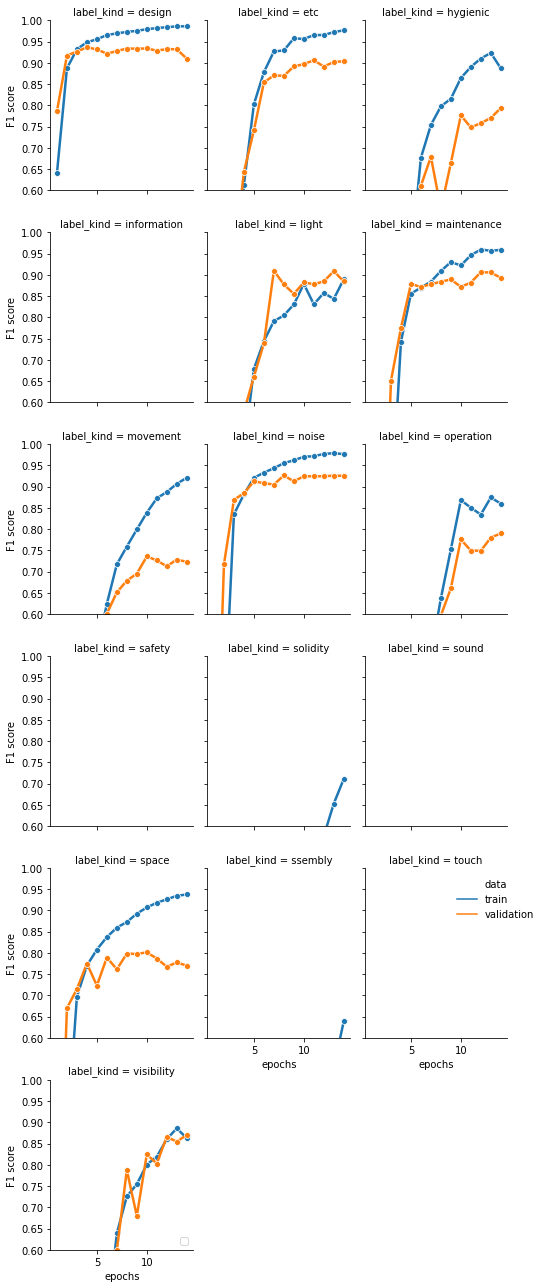

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors

def history_to_value(history, n_label):
    history_out = pd.DataFrame(history.history)
    epochs = history_out.shape[0]
    history_out = history_out.drop('loss', axis=1).stack().reset_index()
    history_out['F1score'] = history_out['level_1'].apply(lambda x: 1 if x.split('_')[-1] =='F1score' else 0)
    history_out['label_kind'] = history_out['level_1'].apply(lambda x: x.split('_')[-2])
    history_out['data'] = history_out['level_1'].apply(lambda x: 'validation' if len(x.split('_')) == 3 else 'train')
    history_out = history_out[history_out['F1score'] == 1][[0, 'label_kind', 'data']].rename(columns={0:'values'}).reset_index(drop=True)
    history_out.sort_values(by=['label_kind', 'data'], inplace=True)
    history_out['epochs'] = list(range(1,epochs+1)) * n_label * 2
    return history_out

def plotDF(history, n_label):
    history_out = history_to_value(history, n_label)
    fig = sns.relplot(data=history_out, x="epochs", y="values", hue="data", col="label_kind", linewidth=2.5, kind='line', col_wrap=3,
                      marker='o', height=3, aspect=0.8)
    plt.legend(loc='lower right')
    leg = fig._legend
    leg.set_bbox_to_anchor([0.9,0.3])
    fig.set(ylim=(0.6, 1), ylabel='F1 score')

plotDF(history, n_label)

In [84]:
best_model = load_model('best_model.h5', custom_objects = {'F1score':F1score})
best_model.evaluate(X_test, y_test_list, batch_size=60)

51/51 [==============================] - 8s 95ms/step - loss: 0.9882 - noise_loss: 0.0756 - sound_loss: 0.0140 - hygienic_loss: 0.0146 - design_loss: 0.2094 - light_loss: 0.0305 - touch_loss: 0.0164 - movement_loss: 0.1262 - operation_loss: 0.0221 - space_loss: 0.2401 - ssembly_loss: 0.0149 - maintenance_loss: 0.0342 - information_loss: 0.0096 - solidity_loss: 0.0834 - safety_loss: 0.0210 - visibility_loss: 0.0224 - etc_loss: 0.0537 - noise_F1score: 0.9310 - sound_F1score: 0.2052 - hygienic_F1score: 0.8933 - design_F1score: 0.9412 - light_F1score: 0.8164 - touch_F1score: 0.0000e+00 - movement_F1score: 0.6801 - operation_F1score: 0.8531 - space_F1score: 0.7949 - ssembly_F1score: 0.5033 - maintenance_F1score: 0.9141 - information_F1score: 0.1438 - solidity_F1score: 0.4146 - safety_F1score: 0.3850 - visibility_F1score: 0.8237 - etc_F1score: 0.9474


[0.9882203936576843,
 0.07559341937303543,
 0.014047417789697647,
 0.014647005125880241,
 0.20942001044750214,
 0.030543675646185875,
 0.016406819224357605,
 0.1262224316596985,
 0.022110555320978165,
 0.2400536686182022,
 0.014857771806418896,
 0.03415171802043915,
 0.009641402401030064,
 0.08342108875513077,
 0.021014215424656868,
 0.02243376150727272,
 0.05365549027919769,
 0.9309980869293213,
 0.20522873103618622,
 0.8932688236236572,
 0.94122713804245,
 0.8163936138153076,
 0.0,
 0.6800859570503235,
 0.8531023859977722,
 0.7949315905570984,
 0.5032679438591003,
 0.9141229391098022,
 0.1437908411026001,
 0.4145572781562805,
 0.38496726751327515,
 0.8237316012382507,
 0.9473589658737183]

In [85]:
import matplotlib.pyplot as plt
def simpleaxis(ax):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
  ax.tick_params(axis='both', which='major', labelsize=10)

def predict_review(sentence, max_len=120):
    #Preprocess, Predict
    sentence = sentence.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
    if sentence == '':
        return "리뷰 해석 불가."

    new = twi.morphs(sentence)
    new = [word for word in new if not word in stopwords]
    encoded = list(filter(lambda x: x>0, [tokenizer.word_index.get(i,0) for i in new])) #단어를 인덱스로 바꿈
    pad_new = [0]*(max_len-len(encoded)) + encoded    # 패딩
    scores = [i[0][0] for i in best_model.predict(np.array([pad_new]))] #이전에 학습한 모델로 예측한 후 결과 저장.

    #Visualize
    fig, ax = plt.subplots(1,1, figsize=(12,9))

    x, y = label_names[::-1], scores[::-1]
    colors = ['#E47F2D' if yy > 0.5 else '#747B86' for yy in y]  ##확률이 0.5 넘는 경우 주황색
    ax.barh(x, y, color=colors, height=0.5)
    ax.set_title("Category")
    ax.set_xlim(0,1)
    for i in range(16):
        ax.text(y[i]+0.01, x[i], '{:.2f}%'.format(y[i]*100), verticalalignment='center')
    simpleaxis(ax)

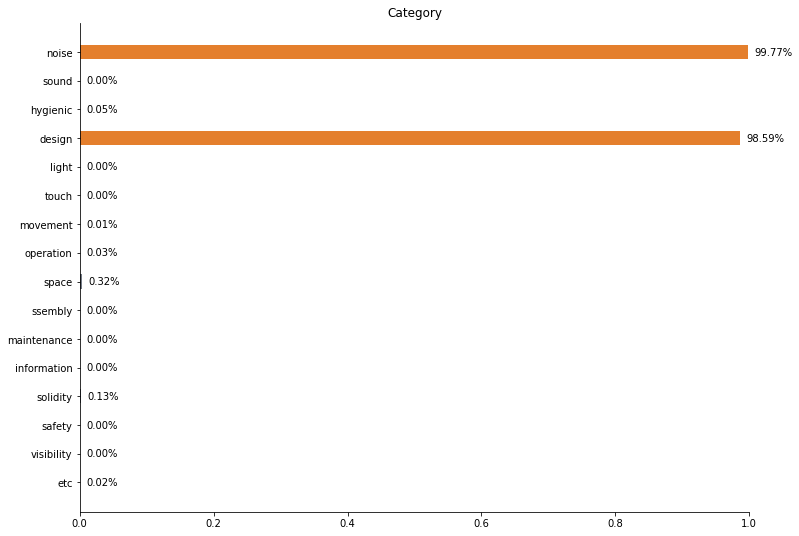

In [86]:
text = "디자인도 맘에들어요 소음도 작고 잘산것같아요"
predict_review(text)

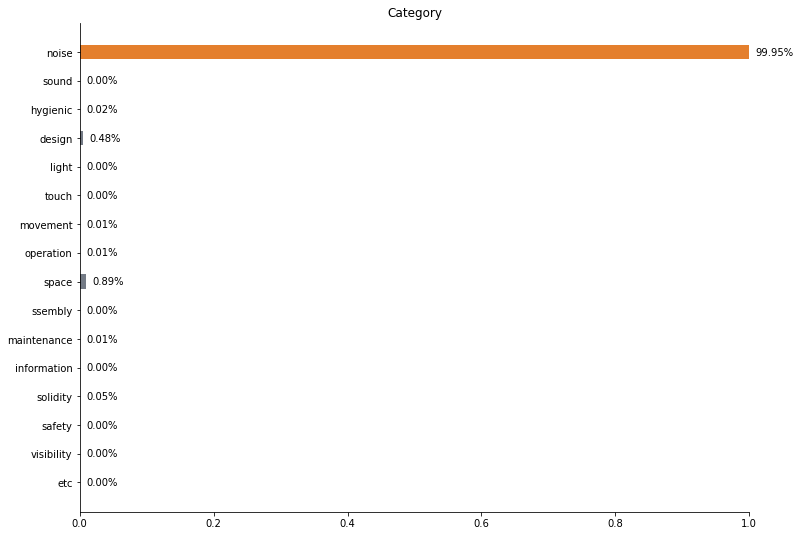

In [87]:
text = "소음이 커서 너무 별로예요"
predict_review(text)

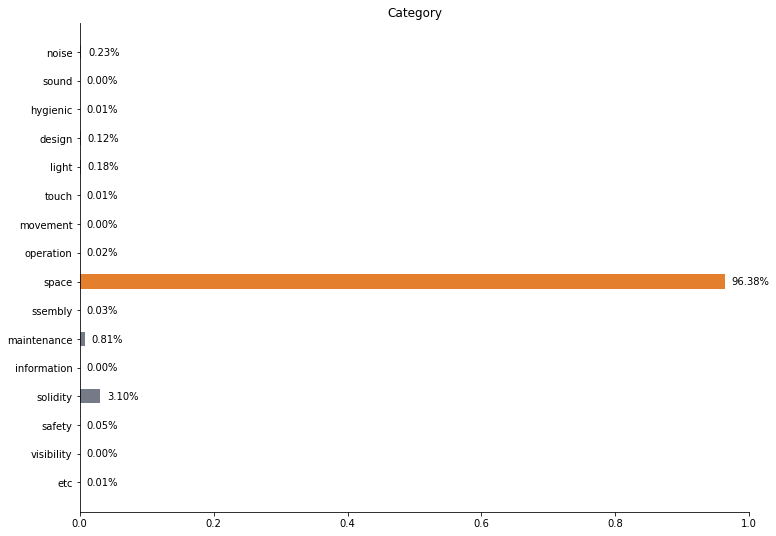

In [88]:
text = "공간 내부도 효율이 떨어지고 너무 시끄럽지만 예뻐요"
predict_review(text)

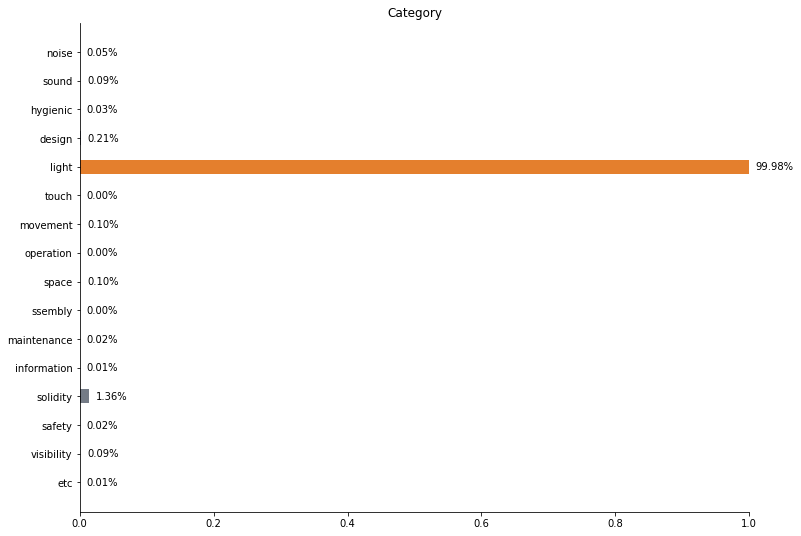

In [89]:
text = "조명이 어두워요"
predict_review(text)

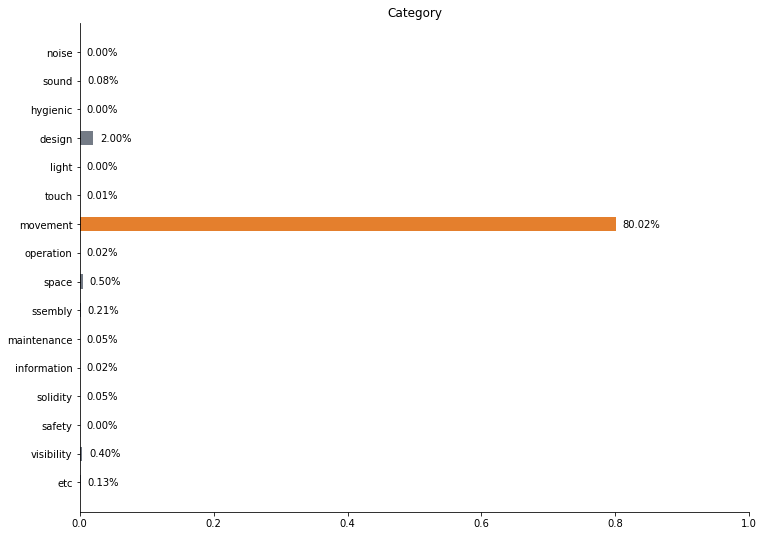

In [90]:
text = "냉장고문 열고 닫는게 편리해요"
predict_review(text)

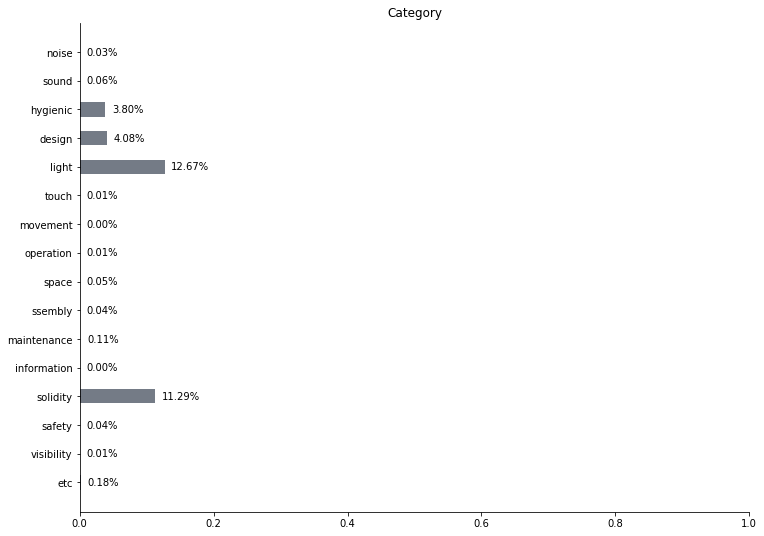

In [91]:
text = "냉장고가 튼튼해서 고장안날것같아요"
predict_review(text)